# Other useful Python packages

## Announcements

- CAPES and survey available!
   - Survey: https://forms.gle/xox1KgV6FwCYoESX6
   - CAPES: https://cape.ucsd.edu/student/instructions.html


## Goals of this lecture

- Review of course: what we've learned this quarter.
- Overview of other useful Python **packages**:
   - `seaborn`: easily and quickly make **data visualizations**.  
   - `scipy`: tools for **statistical analyses**.  
   - `nltk`: tools for **Natural Language Processing**, like *sentiment analysis*.

## What we've learned

- Reflect on the very first day of class: most of you had never programmed before!
- Now you know:
   - How to use **Jupyter notebooks**.  
   - How to write `if` statements and `for` loops.
   - How to create **custom functions**.  
   - How to **read in files** of various types.  
   - How to work with **tabular data** using `pandas`.

That's a lot for ten weeks!

## Data visualization with `seaborn`

### What is data visualization?

[Data visualization](https://en.wikipedia.org/wiki/Data_visualization) refers to the process (and result) of representing data graphically.

- **CSS 2** will dedicate much more time to this.  
- Today: introduction to `seaborn`.

In [3]:
import matplotlib.pyplot as plt # conventionalized abbreviation
import pandas as pd
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### Example dataset

In [4]:
## Load taxis dataset
df_taxis = sns.load_dataset("taxis")
len(df_taxis)

6433

In [6]:
df_taxis.head(2)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


### Histograms

- **Histograms** are critical for visualizing how your data distribute.
- Used for **continuous** variables.

<AxesSubplot:xlabel='distance', ylabel='Count'>

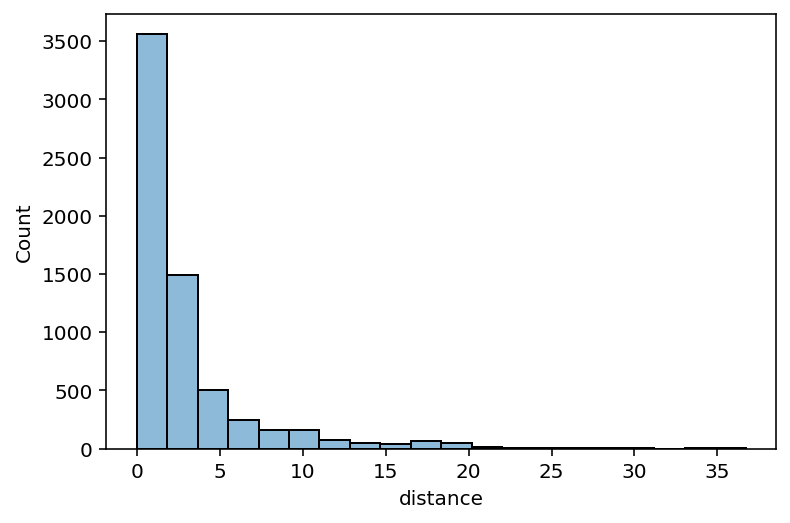

In [11]:
sns.histplot(data = df_taxis, x = "distance", alpha = .5, bins = 20)

### Scatterplots

- **Scatterplots** are useful for visualizing how two *continuous variables* relate.

<AxesSubplot:xlabel='distance', ylabel='fare'>

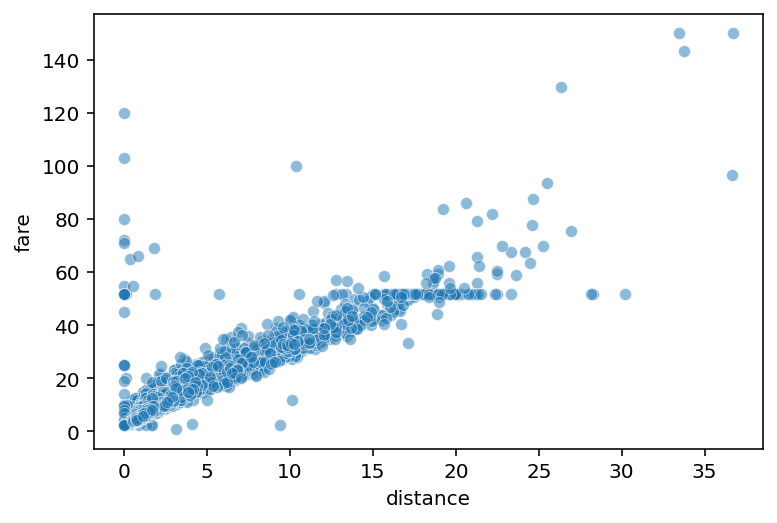

In [12]:
sns.scatterplot(data = df_taxis, x = "distance", 
                y = "fare", alpha = .5)

### Boxplots

- **Boxplots** are useful for visualizing one *continuous variable* as it relates to a *categorical variable*. 

<AxesSubplot:xlabel='payment', ylabel='fare'>

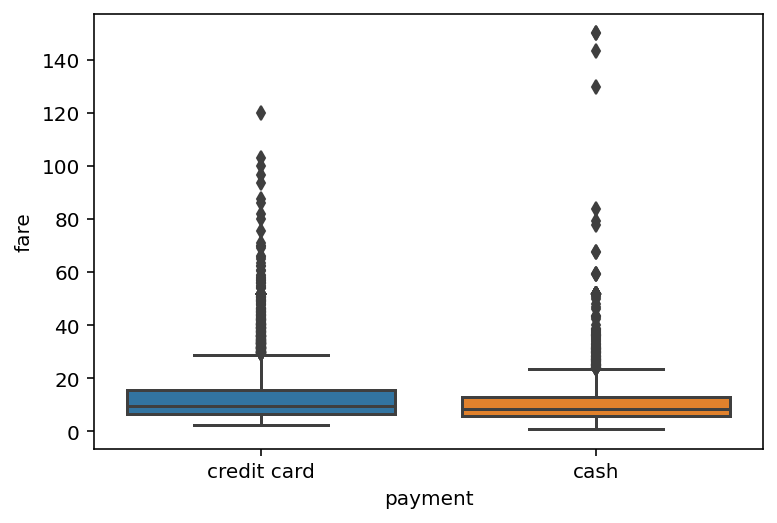

In [17]:
sns.boxplot(data = df_taxis, 
            x = "payment", 
            y = "fare")

### Barplots

- **Barplots** are also useful for visualizing one *continuous variable* as it relates to a *categorical variable*. 
- Typically less *informative* than a boxplot or violinplot.

<AxesSubplot:xlabel='payment', ylabel='fare'>

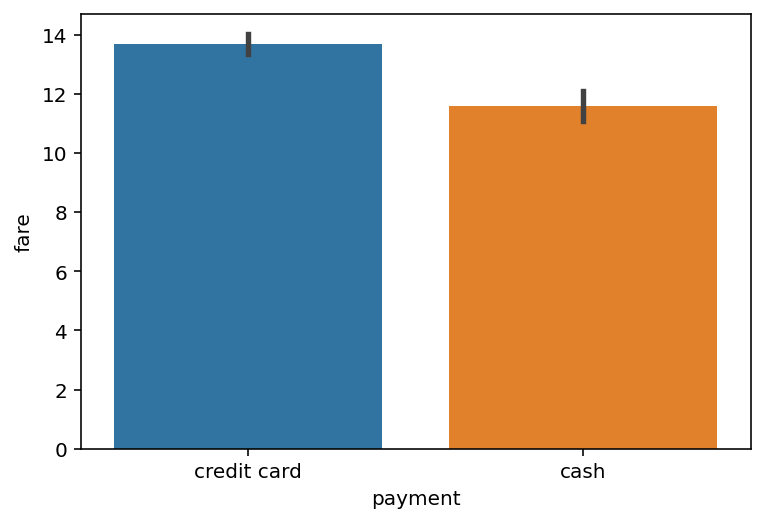

In [21]:
sns.barplot(data = df_taxis, 
            x = "payment", 
            y = "fare")

## Statistics with `scipy`

[`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html) is a Python package with *many uses*, including statistics.

In [22]:
import scipy.stats as ss

### Calculating *correlations*

`scipy.stats` can be used to calculate a **correlation coefficient**.

In [24]:
## Gives correlation between distance and fare
ss.pearsonr(df_taxis['distance'],
           df_taxis['fare'])

(0.9201077027895823, 0.0)

#### Comparing to visualization

Consistent with **correlation coefficient**: strong, positive relationship between `fare` and `distance`.

<AxesSubplot:xlabel='distance', ylabel='fare'>

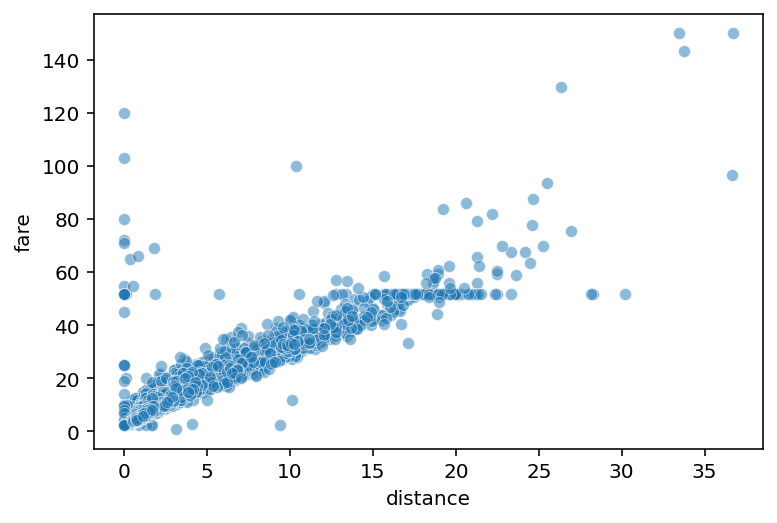

In [26]:
sns.scatterplot(data = df_taxis, x = "distance", 
                y = "fare", alpha = .5)

### Running a *t-test*

A [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) compares two samples: how likely is it that these two samples came from the same "population"?

<AxesSubplot:xlabel='payment', ylabel='fare'>

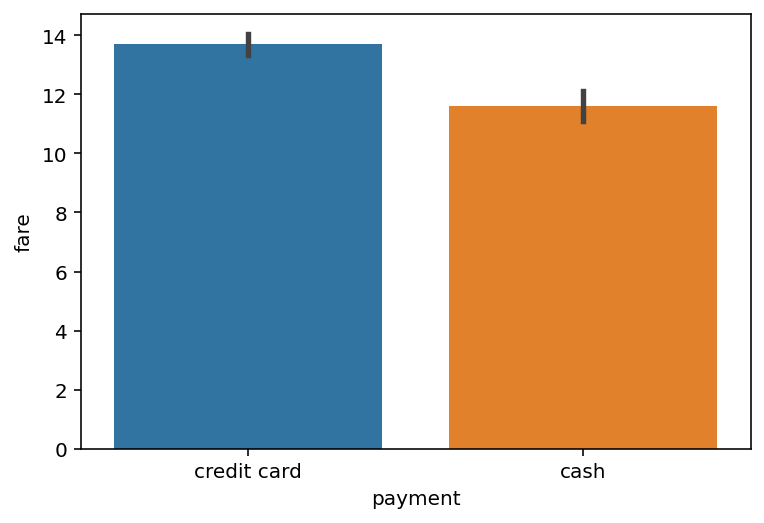

In [27]:
sns.barplot(data = df_taxis, 
            x = "payment", 
            y = "fare")

#### t-test in `scipy`

In [29]:
## First, filter our data to get cash vs. credit
cash = df_taxis[df_taxis['payment'] == 'cash']
credit = df_taxis[df_taxis['payment'] == 'credit card']

In [32]:
## Now, run t-test comparing fare for cash vs. credit
## Very significant p-value
ss.ttest_ind(credit['fare'], cash['fare'])

Ttest_indResult(statistic=6.584862944621184, pvalue=4.91557250875317e-11)

## NLP with `nltk`

[`nltk`](https://www.nltk.org/), or **Natural Language Toolkit**, is an incredibly useful Python package for computational linguistics and NLP.

- Must be *installed*.

In [33]:
import nltk

### Word tokenizing

- So far, we've been trying to **tokenize** text using `split`. 
- Sometimes this doesn't work easily––we have to write complicated code. 
- But `nltk` has written useful functions for **tokenizing** text for us.

In [37]:
nltk.word_tokenize("This is a bunch of words")

['This', 'is', 'a', 'bunch', 'of', 'words']

In [39]:
nltk.word_tokenize("Even with commas, it does well!")

['Even', 'with', 'commas', ',', 'it', 'does', 'well', '!']

### Sentence tokenizing

- `nltk` can also be used to tokenize at the level of **sentences**.

In [42]:
nltk.sent_tokenize("This is one sentence. This is another sentence. Here's another!")

['This is one sentence.', 'This is another sentence.', "Here's another!"]

### Part-of-speech taggging

[Part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) is an operation that involves identifying whether each word is a **noun**, **verb**, etc.

- Very hard to write code to do this ourselves.
- `nltk` does it for us!

#### `pos_tag` with `nltk`

In [43]:
## First, tokenize a sentence into words
words = nltk.word_tokenize("I walked into the room.")

In [48]:
## Then, run pos tagger
nltk.pos_tag(words)

[('I', 'PRP'),
 ('walked', 'VBD'),
 ('into', 'IN'),
 ('the', 'DT'),
 ('room', 'NN'),
 ('.', '.')]

#### Handling words with multiple POS

Some words can be either nouns or verbs––`nltk` guesses POS based on **context**.

In [49]:
## "walk" as noun
nltk.pos_tag(nltk.word_tokenize("He went for a walk."))

[('He', 'PRP'),
 ('went', 'VBD'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('walk', 'NN'),
 ('.', '.')]

In [51]:
## "walk" as verb
nltk.pos_tag(nltk.word_tokenize("He likes to walk."))

[('He', 'PRP'), ('likes', 'VBZ'), ('to', 'TO'), ('walk', 'VB'), ('.', '.')]

### Sentiment analysis

- As we've seen, **sentiment analysis** involves estimating the *valence* of text.  
- Our approach has been simple: count the *positive* and *negative* words.
- But sometimes a word means different things based on context ("The movie was **not** great").
- `nltk` tries to account for this in its sentiment analysis tool.

#### `SentimentIntensityAnalyzer`

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() ## This is a *class*

In [64]:
analyzer.polarity_scores("That restaurant was great!")

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}

#### Accounting for negation and punctuation

In [67]:
## "not delicious" ≠ "delicious"
analyzer.polarity_scores("That restaurant was not great!")

{'neg': 0.473, 'neu': 0.527, 'pos': 0.0, 'compound': -0.5553}

In [68]:
## Punctuation can "intensify" sentiment
analyzer.polarity_scores("That restaurant was not great!!!")

{'neg': 0.51, 'neu': 0.49, 'pos': 0.0, 'compound': -0.6334}

#### There's always a "but"

`nltk` weights the text *after* the "but" more than the text *before*.

In [69]:
## Punctuation can "intensify" sentiment
analyzer.polarity_scores("I liked the food, but the ambience was horrible.")

{'neg': 0.375, 'neu': 0.474, 'pos': 0.15, 'compound': -0.5927}

## Conclusion

- This class is intended to set the **foundation**.
   - Now you are better set up to learn new tools in Python or other programming languages.
- Many more useful tools in Python.

**Thanks for a great quarter!**